In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set_context("talk")  # BIG FONT (because figures likely to be used in small size)

In [2]:
# Figures setup
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    # rc={'figure.figsize': (7,4)},
)

%config InlineBackend.figure_format = 'retina'

## Categorical two groups

Hack note: we're generating the data website manually by putting in thee values (to fake error bars, even though we have only one proporion)

Model= verison A has 0.4 clickthrough; version B has 0.6 clickthrough

In [3]:

website = pd.DataFrame(
[
    ["A", 0.37],
    ["A", 0.42],
    ["A", 0.45],
    ["B", 0.50],
    ["B", 0.6],
    ["B", 0.65],
], columns=["version", "clickrate"])
# website

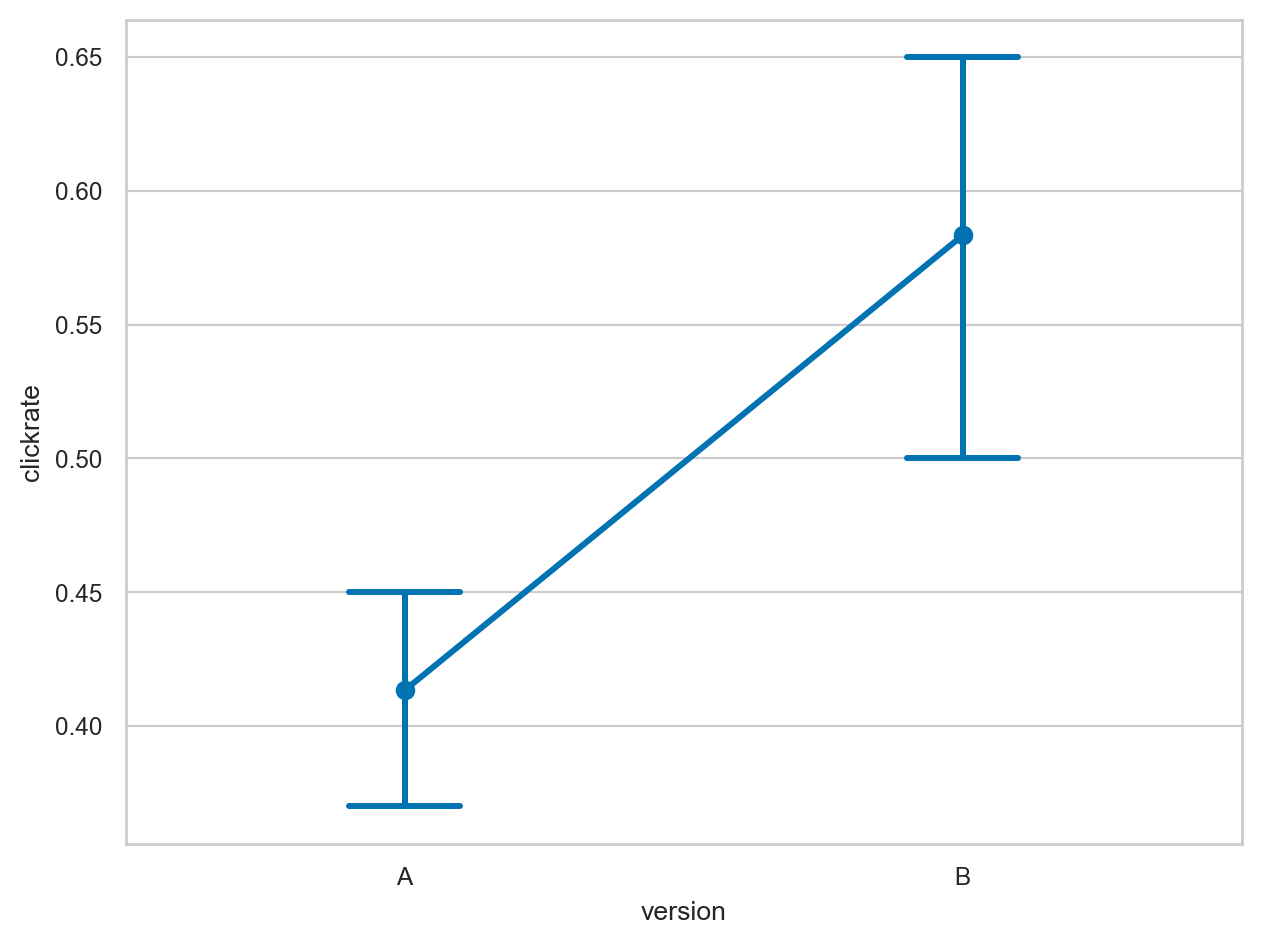

In [4]:
ax = sns.pointplot(x="version", y="clickrate",
            capsize=.2,
            data=website)
plt.tight_layout()

In [5]:
# replaced with bar plot
# ax.get_figure().savefig('figures/compare_websites.png', dpi=75)

## Continuous two groups

In [6]:
# # raw lists of values
# xE = [7.7, 5.9,  7, 4.8, 6.3, 6.3, 5.5, 5.4, 6.5]
# xW = [11.8, 10, 11, 8.6, 8.3, 9.4,   8, 6.8, 8.5]
# # turn into a dataframe (wide data)
# eprices_raw = pd.DataFrame(list(zip(xW,xE)), columns =['West', 'East'], index=range(1,len(xE)+1))
# for table in Introduction
# print(eprices_raw.to_latex())

In [7]:
eprices = pd.read_csv("../datasets/eprices.csv")

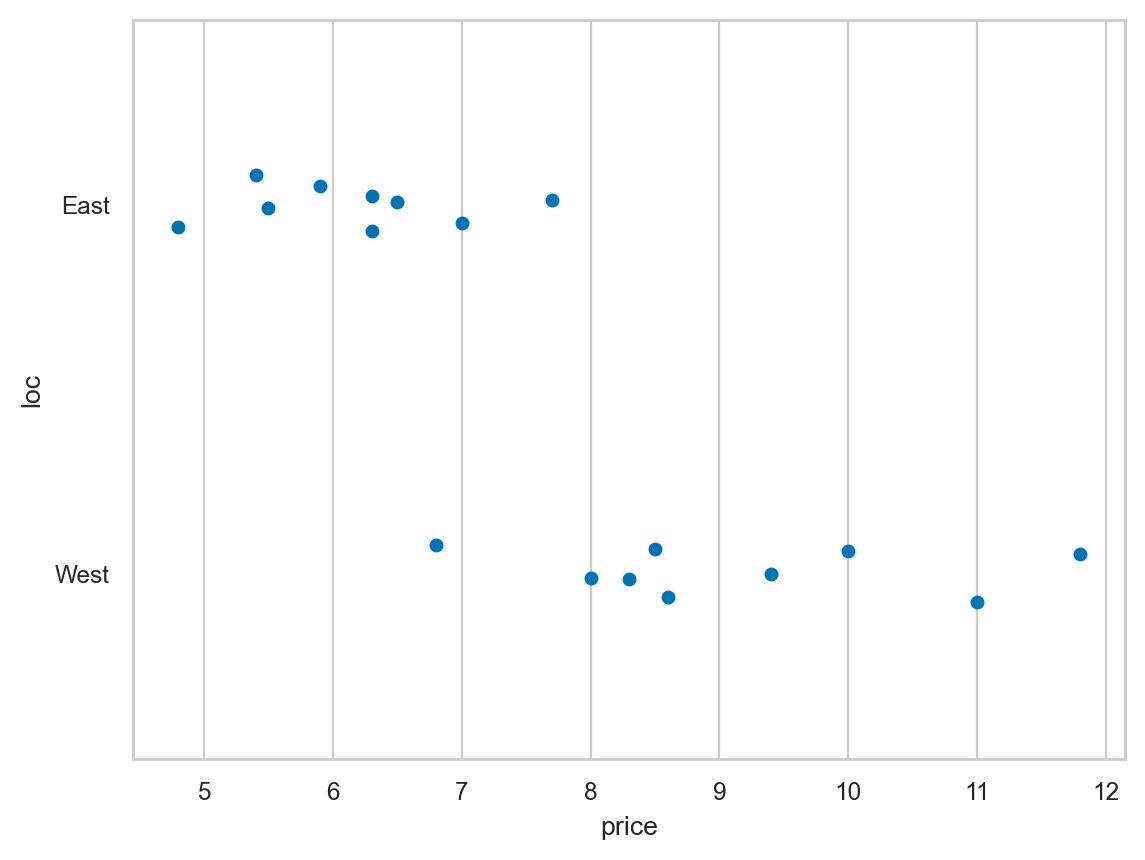

In [8]:
plt.figure()
ax = sns.stripplot(y="loc", x="price", data=eprices, jitter=True)

In [9]:
filename = "figures/compare_eprices.pdf"
ax.figure.tight_layout()
ax.figure.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

In [10]:
eprices.groupby("loc")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
loc,,,,,,,,
East,9.0,6.155556,0.877655,4.8,5.5,6.3,6.5,7.7
West,9.0,9.155556,1.562139,6.8,8.3,8.6,10.0,11.8


## Linear model for grades vs effort

In [11]:
# Load the grades dataset
import io
data_file = io.StringIO("""
student_ID,background,curriculum,effort,score
1,arts,debate,10.96,75
2,science,lecture,8.69,75
3,arts,debate,8.6,67
4,arts,lecture,7.92,70.3
5,science,debate,9.9,76.1
6,business,debate,10.8,79.8
7,science,lecture,7.81,72.7
8,business,lecture,9.13,75.4
9,business,lecture,5.21,57
10,science,lecture,7.71,69
11,business,debate,9.82,70.4
12,arts,debate,11.53,96.2
13,science,debate,7.1,62.9
14,science,lecture,6.39,57.6
15,arts,debate,12,84.3
""")
grades = pd.read_csv(data_file, index_col="student_ID")
grades

,background,curriculum,effort,score
student_ID,,,,
1,arts,debate,10.96,75.0
2,science,lecture,8.69,75.0
3,arts,debate,8.60,67.0
4,arts,lecture,7.92,70.3
5,science,debate,9.90,76.1
6,business,debate,10.80,79.8
7,science,lecture,7.81,72.7
8,business,lecture,9.13,75.4
9,business,lecture,5.21,57.0


<Figure size 640x480 with 0 Axes>

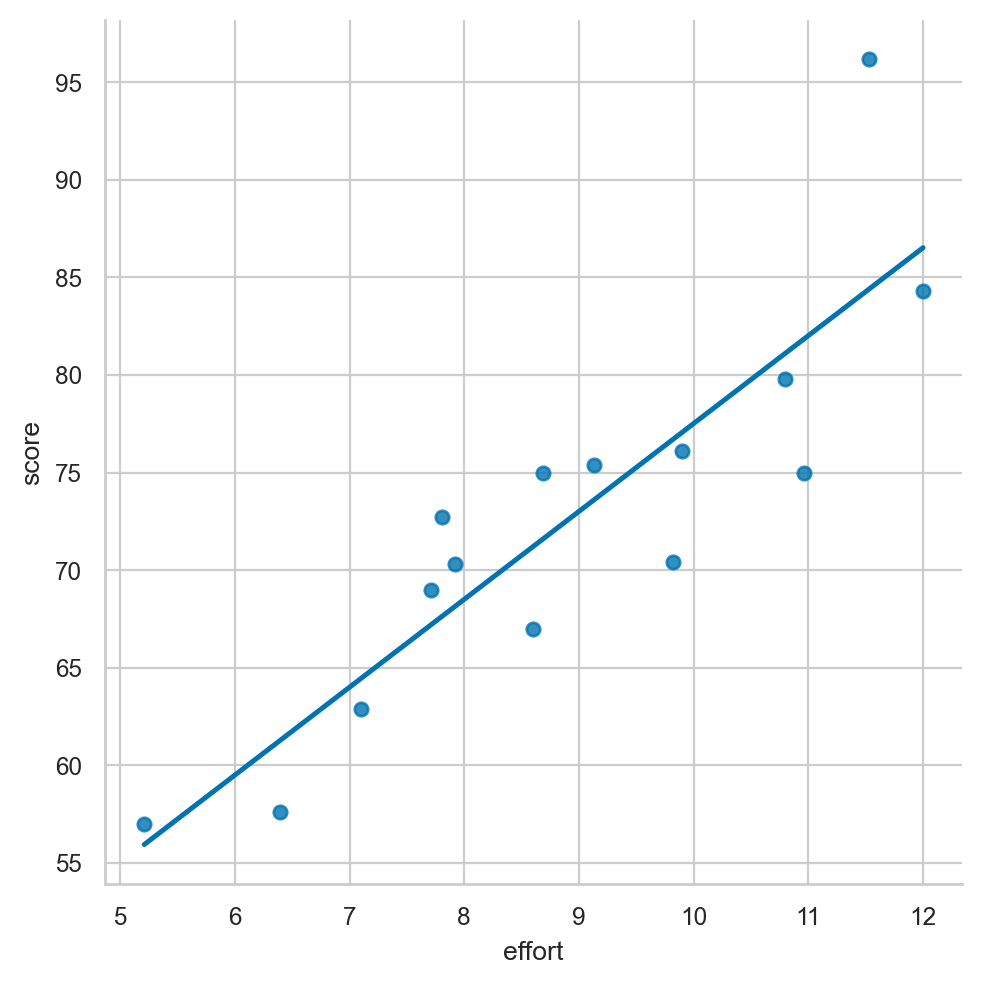

In [12]:
plt.figure()
ax = sns.lmplot(x="effort", y="score", data=grades, ci=None)

In [13]:
filename = "figures/compare_score_vs_effort.pdf"
ax.figure.tight_layout()
ax.figure.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)